### Advent of Code 2018

Starting on 1 December 2018 and, every day until the 25 December 2018, a new two-part puzzle is available. Providing a correct answer to the first part of the puzzle will give you a gold star. If you complete both parts, you receive... two gold stars. The description for the second part of the puzzle is only shown after solving part one. 

I will not copy here the complete descriptions of the puzzle. Follow the links in each section to understand what is asked in each puzzle.

Let's start with some imports and functions that will be used to solve the puzzles.

In [1]:
import os
from collections import defaultdict, Counter, namedtuple, deque
from itertools import cycle, product, chain, count
from datetime import datetime
import re
import string 
import matplotlib.pyplot as plt
from enum import Enum

#file input
def read_input(day, file_path='input/d{}.txt'):
    with open(file_path.format(day), 'r') as f:
        _input = f.read().splitlines()
        
    return _input

def read_line(day, file_path='input/d{}.txt'):
    with open(file_path.format(day), 'r') as f:
        _input = f.readline().strip()
        
    return _input

def read_input_string(day, file_path='input/d{}.txt'):
    with open(file_path.format(day), 'r') as f:
        _input = f.read().strip()
        
    return _input    

### [Day 1: Chronal Calibration](https://adventofcode.com/2018/day/1)

The input for the first puzzle is a list of integers, one per line, representing the frequency changes. Let's have a look at the first few lines in the input file.

In [2]:
input_d01 = read_input('01')
        
input_d01[:10]

['-8', '-18', '-14', '-10', '-7', '-10', '-16', '+19', '-5', '-7']

##### Part One
> Starting with a frequency of zero, what is the resulting frequency after all of the changes in frequency have been applied?

That's easy! The resulting frequency corresponds to the sum of all the frequency changes

In [3]:
def d01_p1():
    chgs = [int(x) for x in input_d01]
        
    return sum(chgs)

d01_p1()

497

Submiting the output above will earn us our first star. On to part 2

##### Part Two
> What is the first frequency your device reaches twice?

Reading carefully the description we realize that we have to loop multiple times over the input frequency changes. After a quick search I found __[itertools.cycle](https://docs.python.org/3.6/library/itertools.html#itertools.cycle)__. This allow us to make an iterator that repeats indefinitely over the elementos of the input list. In each iteration, the resulting frequency is added to the set if not visited previously. The process stops when a match is found in the set.  

<b>Important:</b> Remember to add the initial frequency (zero) to the set. Otherwise the solution fails for the trivial case: [-1, +1]

In [4]:
def d01_p2():
    chgs = [int(x) for x in input_d01]
    
    f = 0                  #starting frequency
    visited = set([f])     #store the starting frequency
    for c in cycle(chgs): 
        f += c
        if f in visited:
            return f
        else:
            visited.add(f)

d01_p2()

558

That's our second star. The first puzzle and first day are completed.

### [Day 2: Inventory Management System](https://adventofcode.com/2018/day/2)

Today the input is a list of box IDs

In [5]:
input_d02 = read_input('02')
        
input_d02[:10]

['bazvmqthjtrnlosiecxyghkwud',
 'pazvmqbijirzlosiecxyghkwud',
 'pazvtqbmjtrnlosiecxyghkwzd',
 'pazvmqbfjtrjlosnlcxyghkwud',
 'pazvkqbfjtrtlosiecjyghkwud',
 'paztmqbfjtrnbosiecxyglkwud',
 'pazvmqbfjtunlosievxmghkwud',
 'pazvmqbfjtmngosiecyyghkwud',
 'jazvmqbfjtrnlosiecxygikpud',
 'pazvqqbfctrnlosimcxyghkwud']

##### Part One

Our objective is to identify the number of box IDs that contain a letter which appears exactly twice and those that have a letter that appears exactly three times. Multiplying these two numbers produces a "checksum" which is the answer to our puzzle.

> What is the checksumfor your list of box IDs?

In [6]:
def d02_p1():   
    has_two = 0
    has_three = 0

    for i in input_d02:
        c = Counter(i)
        if len([k for k,v in c.items() if v == 2]) > 0:
            has_two += 1
        if len([k for k,v in c.items() if v == 3]) > 0:
            has_three += 1
            
    return has_two * has_three

d02_p1()

8296

#### Part Two

The boxes full of prototype fabric will have IDs which differ by exactly one character at the same position in both strings

> What letters are common between the two correct box IDs?

Let's start by identifying the boxes that differ by exactly one letter at the same position.

In [7]:
def d02_p2():    
    for box_id1 in input_d02:
        for box_id2 in input_d02:
            if len([i for i in range(len(box_id1)) if box_id1[i] != box_id2[i]]) == 1:
                print('Candidate boxes: {} and {}'.format(box_id1, box_id2))
                return (box_id1, box_id2)
            
(box_id1, box_id2) = d02_p2()                

Candidate boxes: pazvmqbfjtrbeosiecxlghkwud and pazvmqbfotrbeosiecxlghkwud


We found our candidate boxes, we need just to find the letters that are common to both boxes - this is as simple as removing the differing character from either of the boxes.

In [8]:
ans = []
for i in range(len(box_id1)):
    if box_id1[i] == box_id2[i]:
        ans.append(box_id1[i])
        
"".join(ans)

'pazvmqbftrbeosiecxlghkwud'

That's our second star. The second puzzle and second day are completed.

### [Day 3: No Matter How You Slice It](https://adventofcode.com/2018/day/3)

Today's input is a list of claims.

Each Elf has made a claim about which area of fabric would be ideal for Santa's suit. All claims have an ID and consist of a single rectangle with edges parallel to the edges of the fabric. Each claim's rectangle is defined as follows:

    The number of inches between the left edge of the fabric and the left edge of the rectangle.
    The number of inches between the top edge of the fabric and the top edge of the rectangle.
    The width of the rectangle in inches.
    The height of the rectangle in inches.
    
#### Part One    
    
> How many square inches of fabric are within two or more claims?    


In [9]:
input_d03 = read_input('03')
        
input_d03[:10]

['#1 @ 151,671: 11x15',
 '#2 @ 887,913: 28x22',
 '#3 @ 808,917: 17x11',
 '#4 @ 727,230: 26x26',
 '#5 @ 638,853: 21x20',
 '#6 @ 713,106: 17x18',
 '#7 @ 745,709: 18x15',
 '#8 @ 550,92: 29x19',
 '#9 @ 389,659: 26x24',
 '#10 @ 501,813: 27x29']

Let's first start by parsing the input file. Each line represents a claim with format: 

> \#claimID @ x,y: wxh

We could do this using the function [split()](https://docs.python.org/3/library/stdtypes.html#str.split) to partition the line into words and extract the claim details, or using the fact that all the claim attributes are integers, we can create a simple regex to match an integer and [findall()](https://docs.python.org/3/library/re.html#re.findall) to return all the instances of these in the input.

In [10]:
re.findall(r'\d+', input_d03[0])

['1', '151', '671', '11', '15']

Let's lay all the claims on the fabric for Santa's suit

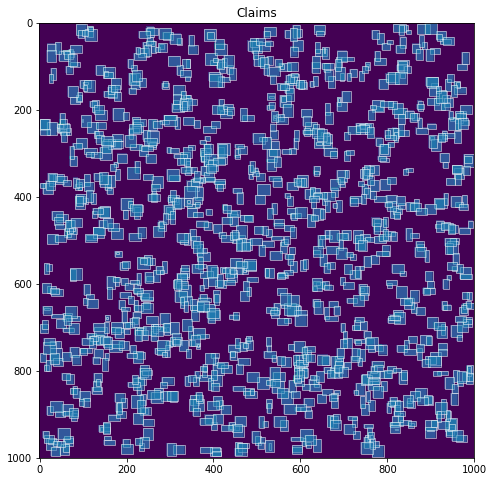

In [11]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from matplotlib import cm

fabric = np.zeros(shape=(1000,1000))

patches = []
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("Claims")

for claim in input_d03:
    claimID, x, y, w, h = [int(n) for n in re.findall('\d+', claim)]
    fabric[y:y+h,x:x+w] += 1
    
    patches.append(Rectangle((x,y), w,h, label=str(claimID)))
    
pc = PatchCollection(patches, alpha=0.5, facecolor=None, edgecolor="white")
ax.add_collection(pc)

ax.imshow(fabric);

We can use a [dictionary](https://docs.python.org/3/library/collections.html#collections.defaultdict) to store all the claimed squares and the number of times each was claimed. The answer to part one of the puzzle corresponds to the number of keys in the dictionary that have a value greater than one.

In [12]:
def d03_p1():
    claimed_squares = defaultdict(int)
    for claim in input_d03:
        claim_id, x, y, w, h = [int(n) for n in re.findall('\d+', claim)]
        for xy in product(range(x, x+w), range(y, y+h)):
            claimed_squares[xy] += 1
    return sum(1 for v in claimed_squares.values() if v > 1)

d03_p1()

124850

#### Part Two
> What is the ID of the only claim that doesn't overlap?

A claim will not overlap with any other claim if all its squares have value one in the claimed squares dictionary.

In [13]:
def d03_p2():
    claimed_squares = defaultdict(int)
    #store claims
    for claim in input_d03:
        claim_id, x, y, w, h = [int(n) for n in re.findall('\d+', claim)]
        for xy in product(range(x, x+w), range(y, y+h)):
            claimed_squares[xy] += 1
            
    #find the claim with squares not claimed by any other Elf
    for claim in input_d03:
        claim_id, x, y, w, h = [int(n) for n in re.findall('\d+', claim)]
        if all(claimed_squares[xy] == 1 for xy in product(range(x, x+w), range(y, y+h))):
            return claim_id
        
d03_p2()

1097

And that's the third day completed!

### [Day 4: Repose Record](https://adventofcode.com/2018/day/4)

For day four we are given a log containing the ID of the guard on duty on a given night as well as when they fall asleep or wake up while at their post. 

#### Part One

>Find the guard that has the most minutes asleep. What minute does that guard spend asleep the most?  
>What is the ID of the guard you chose multiplied by the minute you chose?

As usual, let's start by having a look at the format of our puzzle input.

In [14]:
input_d04 = read_input('04')
        
input_d04[:10]

['[1518-05-24 23:56] Guard #1721 begins shift',
 '[1518-08-22 00:09] falls asleep',
 '[1518-05-19 00:53] wakes up',
 '[1518-04-19 23:48] Guard #773 begins shift',
 '[1518-09-24 00:35] wakes up',
 '[1518-07-15 00:56] wakes up',
 '[1518-08-10 00:03] Guard #769 begins shift',
 '[1518-07-10 00:50] wakes up',
 '[1518-07-12 00:54] falls asleep',
 '[1518-05-30 00:51] wakes up']

As all asleep/awake times are during the midnight hour (00:00 - 00:59), only the minute portion (00 - 59) is relevant for those events. We can store the guards sleep patterns in a dictionary of lists (of integers), where each list has 60 elements.

In [15]:
def sleep_pattern():
    sleep = defaultdict(lambda:[0 for x in range(60)]) # sleepTimes[guard] = [1, 0, 0, 1...]
    #sleep = defaultdict(lambda: defaultdict(int))
    #Compute the sleep times for all the guards
    for event in sorted(input_d04):
        time, action = event[1:].split("] ")
        date = datetime.strptime(time, '%Y-%m-%d %H:%M')

        if "Guard" in action:
            guard = int(re.findall("[\d]+", action)[0])
        elif "asleep" in action:
            start = date.minute
        elif "wakes" in action:
            end = date.minute
            for m in range(start, end):
                sleep[guard][m] += 1
    
    return sleep

In [16]:
def d04_p1():
    sleep = sleep_pattern()
    
    guard_most_sleep = max(sleep.keys(), key = (lambda g: sum(sleep[g])))
    minute_most_asleep = sleep[guard_most_sleep].index(max(sleep[guard_most_sleep]))
    
    return guard_most_sleep * minute_most_asleep

d04_p1()

38813

#### Part Two

> Of all guards, which guard is most frequently asleep on the same minute?  
> What is the ID of the guard you chose multiplied by the minute you chose?

In [17]:
def d04_p2():
    sleep = sleep_pattern()
    
    guard_most_sleep_minute = max(sleep.keys(), key=lambda g: max(sleep[g]))
    minute_most_asleep = sleep[guard_most_sleep_minute].index(max(sleep[guard_most_sleep_minute]))

    return guard_most_sleep_minute * minute_most_asleep

d04_p2()


141071

### [Day 5: Alchemical Reduction](https://adventofcode.com/2018/day/5)

In day five we analyse the chemical composition of santa's suit's material. The suit's material is made of a polymer formed by smaller units which, when triggered, react with each other such that two adjacent units of the same type and opposite polarity are destroyed. 

#### Part One

>How many units remain after fully reacting the polymer you scanned?

In [18]:
input_d05 = read_line('05')

input_d05[:80]

'bBkKQqgaAGzyYZCcGgXVvGgxQxtTXwWqJOojHhWwHhAaIZKkzcCCcHhqhHbBnNNnTtFfQzZiGgeEmHhg'

Units' types are represented by letters; units' polarity is represented by capitalization. For instance, r and R are units with the same type but opposite polarity, whereas r and s are entirely different types and do not react. We know that 

    The ASCII codes for a-z are 97-122  
    The ASCII codes for A-Z are 65-90

So, for any given upper case letter, we obtain its corresponding lower case counterparty by adding 32 to its ASCII code. For example, 
>The ASCII code for 'A' = 65 and 65 + 32 = 97 which is the ASCII code for 'a'. 

We can use this information to define a small function that checks if two units react. 

In [19]:
def react(unit1, unit2):
    return abs(ord(unit1)-ord(unit2)) == 32

We can use this function as we iterate over the list to fully react the polymer

In [20]:
def react_polymer(polymer):
    res = []
    res.append(polymer[0])
    
    for p in polymer[1:]:
        if len(res) > 0 and react(p, res[-1]):
            res.pop()
        else:
            res.append(p)
    
    return len(res)

def d05_p1(polymer):   
    return react_polymer(polymer)
    
d05_p1(input_d05)

10598

#### Part Two

> What is the length of the shortest polymer you can produce by removing all units of exactly one type and fully reacting the result?

In [21]:
def d05_p2(polymer):
    units = set([c.lower() for c in polymer])

    return min([react_polymer(polymer.replace(u, '').replace(u.upper(), '')) for u in units])

d05_p2(input_d05)   

5312

### [Day 6: Chronal Coordinates](https://adventofcode.com/2018/day/6)

Today's input is a list of coordinates on a two dimensional space. Using only the [Manhattan distance](https://en.wikipedia.org/wiki/Taxicab_geometry) we need to  determine the area around each coordinate consisting of all the points that are closest to that coordinate (and aren't tied in distance to any other coordinate), ie, we need to create a [Voronoi diagram](https://en.wikipedia.org/wiki/Voronoi_diagram).

#### Part One

> What is the size of the largest area that isn't infinite?

We start by reading the input and defining a function to calculate the manhattan distance between two points in a two dimensional space.

In [22]:
input_d06 = read_input('06')

def manhattan_distance(a, b):
    '''Manhattan distance between two points on a two dimensional space'''
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

We can define a grid that contains all the given coordinates and for each point on this grid, calculate the coordinate that is closest to it. 

First a function to calculate the closest coordinate for a given point.

In [23]:
def closest_coordinate(p, coordinates):
    distance = {}
    for c in coordinates:
        distance[c] = manhattan_distance(p, c)

    #return the coordinate that is closest to p if there is no tie
    p1, p2 = sorted(distance.items(), key=lambda kv: kv[1])[:2]
    return p1[0] if p1[1] < p2[1] else None      


The only thing left is to identify the areas that expand infinitely. 

If for a given coordinate, it exists a point on the perimeter of the grid that is part of its corresponding area (points that are closest to that particular coordinate), this coordinate will also be the closest to every point extending outward along the line perpendicular to that point on the perimeter. 

If a coordinate is not the closest coordinate to any point on the perimeter box it's area is bounded by the area of the box, ie, its area is not infinite. 

So the infinite areas are those that touch the edges of the perimeter box.

In [24]:
def d06_p1(coordinates):
    min_x = (min(coordinates, key =lambda p: p[0])[0])
    max_x = (max(coordinates, key =lambda p: p[0])[0])
    min_y = (min(coordinates, key =lambda p: p[1])[1])
    max_y = (max(coordinates, key =lambda p: p[1])[1])
    
    grid = product(range(min_x, max_x), range(min_y, max_y))
   
    area_size = Counter(closest_coordinate(p, coordinates) for p in grid)

    perimeter_box = chain([(x, min_y) for x in range(min_x, max_x)],
                          [(x, max_y) for x in range(min_x, max_x)],
                          [(min_x, y) for y in range(min_y, max_y)],
                          [(max_x, y) for y in range(min_y, max_y)])
        
    #infinite areas: areas that touch the edges of the perimeter box
    infinite_areas = set()
    for pb in perimeter_box:
        coord = closest_coordinate(pb, coordinates)
        if coord is not None:
            infinite_areas.add(coord)
    
    #remove the infinite areas from the dictionary
    #for c in infinite_areas:
    #    area_size.pop(c, None)      
    #return max(area_size.values())
    
    return max(size for c, size in area_size.items() if c not in infinite_areas)

coordinates = [tuple(map(int, c.split(', '))) for c in input_d06]

d06_p1(coordinates)

6047

#### Part Two

>What is the size of the region containing all locations which have a total distance to all given coordinates of less than 10000?

In [25]:
def d06_p2(coordinates, max_distance=10000):
    max_x = (max(coordinates, key =lambda p: p[0])[0])
    max_y = (max(coordinates, key =lambda p: p[1])[1])
    
    grid = product(range(max_x+1), range(max_y+1))
    
    region = 0
    for p in grid:
        total_distance = sum(manhattan_distance(p, x) for x in coordinates)
        if total_distance < max_distance:
            region += 1
            
    return region
       
d06_p2(coordinates)

46320

### [Day 7: The Sum of Its Parts](https://adventofcode.com/2018/day/7)

In Day 7 we help the Elves building Santa's Sleigh. The puzzle input consists of a set of instructions specifying a series of steps and requirements about which steps must be finished before others can begin. Each step is designated by a single letter. Our goal is to determine the order in which the steps should be completed. If more than one step is ready, choose the step which is first alphabetically.



#### Part One

>In what order should the steps in your instructions be completed?

This is a problem of [Topological Sorting](https://en.wikipedia.org/wiki/Topological_sorting) so I'm going to use [Kahn's algorithm](https://en.wikipedia.org/wiki/Topological_sorting#Kahn's_algorithm) to try and solve it.

In [26]:
input_d07 = read_input('07')

input_d07[:5]

['Step S must be finished before step C can begin.',
 'Step C must be finished before step R can begin.',
 'Step L must be finished before step W can begin.',
 'Step V must be finished before step B can begin.',
 'Step P must be finished before step Y can begin.']

First we start by parsing the input and saving all the edges and the order (number of incoming vertices) of each vertex. Due to one important requirement in our puzzle ("If more than one step is ready, choose the step which is first alphabetically" we cannot really use the queue FIFO mechanism so I will use a list to store the vertices with no incoming edge.

The algorithm is very simple:
    
    (1) At the start select all the the vertices with order 0 and add them into a <s>queue</s> list.
    (2) Sort the list in alphabetical order
    (3) Remove the first vertex from the <s>queue</s> list and then:
       Decrease the order by 1 for all its neighboring vertices.
       If the order of a neighboring vertice becomes zero add it to the <s>queue</s> list. 
       Sort the newly updated list of vertices with order 0

    Step 3 is repeated until the <s>queue</s> list is empty.


In [27]:
def d07_p1(instructions):
    in_order = defaultdict(int)
    edges = defaultdict(list)
    
    for i in instructions:
        match = re.match(r'Step (.) must be finished before step (.) can begin.', i)
        edges[match.group(1)].append(match.group(2))
        in_order[match.group(2)] += 1
        
    zero_order = []
    for e in sorted([k for k in edges.keys() if in_order[k] == 0]):
        zero_order.append(e)

    ans = []
    while zero_order:
        v = zero_order.pop(0)
        ans += v
        for n in edges[v]:
            in_order[n] -= 1
            if in_order[n] == 0:
                zero_order.append(n)
        zero_order.sort()

    return ''.join(ans)

d07_p1(input_d07)

'SCLPAMQVUWNHODRTGYKBJEFXZI'

#### Part Two

Each step takes 60 seconds plus an amount corresponding to its letter: A=1, B=2, C=3, and so on. So, step A takes 60+1=61 seconds, while step Z takes 60+26=86 seconds. No time is required between steps. Considering that multiple workers can work on steps simultaneously and that if multiple steps are available, workers should still begin them in alphabetical order.

>With 5 workers and the 60+ second step durations described above, how long will it take to complete all of the steps?

In [28]:
def step_duration(step):
    return 60 + ord(step) - ord('A') + 1

def d07_p2(instructions, workers=5):
    in_order = defaultdict(int)
    edges = defaultdict(list)
    
    for i in instructions:
        match = re.match(r'Step (.) must be finished before step (.) can '
                 'begin.', i)
        edges[match.group(1)].append(match.group(2))
        in_order[match.group(2)] += 1
        
    ready_steps = []
    for e in sorted([k for k in edges.keys() if in_order[k] == 0]):
        ready_steps.append((e, step_duration(e)))

    #tuple (step, end_time)
    in_progress = []
    
    for seconds_elapsed in count():
        #steps that ended in this iteration                                           
        ended = [s[0] for s in in_progress if s[1] == seconds_elapsed]
        for e in ended:
            workers += 1
            for n in edges[e]:
                in_order[n] -= 1
                #we can release the steps that were dependent on only this step
                if in_order[n] == 0:
                    ready_steps.append((n, seconds_elapsed + step_duration(n)))

                ready_steps.sort(key = lambda t : t[1])

        #remove the steps that ended in this iteration
        in_progress = [step for step in in_progress if step[1] >
                seconds_elapsed]
                                               
        while workers and ready_steps:
            v = ready_steps.pop(0)
            workers -= 1
            in_progress.append((v[0], v[1]))
            
        if not ready_steps and not in_progress:
            return seconds_elapsed 


d07_p2(input_d07)

1234

### [Day 8: Memory Maneuver](https://adventofcode.com/2018/day/8)

The sleigh is going nowhere if we cannot activate its navigation system. In order to do so we need to calculate a license number. 

The puzzle input is the navigation system's license file. It consists of a list of numbers that, when processed, produces a tree that can be used to calculate the license number. The tree is made up of nodes; a single, outermost node forms the tree's root, and it contains all other nodes in the tree (or contains nodes that contain nodes, and so on).

Specifically, a node consists of:

    A header, which is always exactly two numbers:
        The quantity of child nodes.
        The quantity of metadata entries.
    Zero or more child nodes (as specified in the header).
    One or more metadata entries (as specified in the header).

Each child node is itself a node that has its own header, child nodes, and metadata.

I'll use a [named tuple](https://docs.python.org/3.7/library/collections.html#collections.namedtuple) to define the tree structure. The parsing of the nodes and metadata can be easily done using a recursive function.

#### Part One

>What is the sum of all metadata entries?

In [29]:
input_d08 = read_line('08')

input_d08[:10]

'9 11 7 3 4'

In [30]:
Tree = namedtuple('Tree', ['children', 'metadata'])

def build_tree(tree_data):
    child_nodes, metadata_entries = tree_data.pop(0), tree_data.pop(0)
    
    return Tree([build_tree(tree_data) for _ in range(child_nodes)], 
                [tree_data.pop(0) for _ in range(metadata_entries)])

#tree_nums = [0, 3, 1, 1, 1]
#print(build_tree(tree_nums))
#tree_nums = [1, 3, 0, 1, 1, 1, 1, 1]
#print(build_tree(tree_nums))

def sum_metadata(tree):
    #return sum(tree.metadata) + sum(map(sum_metadata, tree.children))
    return sum(tree.metadata) + sum(sum_metadata(child) for child in tree.children)
    
def d08_p1(license_file):
    root = build_tree(license_file)
    
    return sum_metadata(root)

license_file = [int(i) for i in re.findall(r'\d+', input_d08)]
d08_p1(license_file)

47112

#### Part Two

> What is the value of the root node?

The value of a node depends on whether it has child nodes.

    If a node has no child nodes, its value is the sum of its metadata entries.
    If a node does have child nodes, its value is the sum of the values of the child nodes referenced by the metadata entries.

In [31]:
def node_value(node):
    if not node.children:
        return sum(node.metadata)
    else:
        return sum(node_value(node.children[i - 1]) for i in node.metadata if i > 0 and i <= len(node.children))   
    
#a = build_tree([2, 3, 0, 3, 10, 11, 12, 1, 1, 0, 1, 99, 2, 1, 1, 2])
#b = build_tree([0, 3, 10, 11, 12])
#c = build_tree([1, 1, 0, 1, 99, 2])
#d = build_tree([0, 1, 99])
#print(node_value(a))
#print(node_value(b))
#print(node_value(c))
#print(node_value(d))    

In [32]:
def d08_p2(license_file):
    root = build_tree(license_file)
    
    return node_value(root)

license_file = [int(i) for i in re.findall(r'\d+', input_d08)]
d08_p2(license_file)

28237

### [Day 9: Marble Mania](https://adventofcode.com/2018/day/9)

And on the 9th day they chilled out... While waiting for the navigation system to initialize the elfs introduce us to their favorite marble game. 

Given a set of marbles numbered starting from 0 and increasing by 1, the rules of the game are as follows:
        
The game starts by placing the marble numbered 0 in the circle. This marble is designated the **current marble**. Then, each Elf takes a turn placing the lowest-numbered remaining marble until no marble is left:

       - If the marble about to be placed is a multiple of 23 then it is placed in the circle between the marbles 
       that are 1 and 2 marbles clockwise of the current marble and it becomes the new current marble.
       - If the marble is not a multiple of 23, first, the current player keeps the marble they would have placed, adding 
       it to their score. In addition, the marble 7 marbles counter-clockwise from the current marble is removed from 
       the circle and also added to the current player's score. The marble located immediately clockwise of the marble 
       that was removed becomes the new current marble.
    
The goal of the game is to be the player with the highest score after the last marble is used up.

#### Part One

>What is the winning Elf's score?

I use a deque to represent the circle, rotating whenever there is a change in the current marble. The **current marble** is always the element at the head of the deque.

In [33]:
input_d09 = read_line('09')

def d09_p1(num_players, last_marble):
    circle = deque([0]) #Place the marble 0 in the circle
    current_player = 1
    scores = defaultdict(int) #scores[current_player] += marble
    
    for marble in range(1, last_marble+1):
        if marble % 23 == 0:
            scores[current_player] += marble
            circle.rotate(7)
            scores[current_player] += circle.popleft()
        else:
            circle.rotate(-2)
            circle.appendleft(marble)
        
        current_player = marble % num_players
        
    return max(scores.values())
    
num_players, last_marble = [int(i) for i in re.findall(r'\d+', input_d09)]
d09_p1(num_players, last_marble)

374287

#### Part Two

>What would the new winning Elf's score be if the number of the last marble were 100 times larger?

In [34]:
last_marble = 71010 * 100
d09_p1(num_players, last_marble)

3083412635

### [Day 10: The Stars Align](https://adventofcode.com/2018/day/10)

As the navigation system proves incapable of providing directions in the artic circle conditions, the Elves suggest an alternative system. Rescue operations will sometimes arrange points of light in the sky to guide the missing Elves back to base. The points move slowly in the sky until they align and display a message. The points move slowly enough that it takes hours to align them, but have so much momentum that they only stay aligned for a second.

Our puzzle input is a set of coordinates and their velocity (position change per second), representing the lights in the sky. Given enough time, those positions and velocities will move the points into a cohesive message!

#### Part One

> What message will eventually appear in the sky?

Looking at the example provided, I assumed that the lights are initially spread out across the sky and as the time passes they will slowly align and converge to a section of the sky. This means that the size of the area/box containing all the lights will decrease over time (until a certain point in time when the lights will start to spread out again). The message will be displayed when the size of this area is the (local?) minimum.

I'll just simulate the passage of time, and for every second calculate the area of the "box" that contains all the lights. When the area starts to increase, the execution stops and I'll try to read the message.

In [35]:
input_d10 = read_input('10')

#input_d10[:10]

Light = namedtuple('Light', ['x', 'y', 'vx', 'vy'])

def show_sky(lights):
    min_x = min(l.x for l in lights)
    max_x = max(l.x for l in lights)
    min_y = min(l.y for l in lights)
    max_y = max(l.y for l in lights)
    
    for y in range(min_y - 1, max_y + 2):
        r = []
        for x in range(min_x - 1, max_x + 2):
            if (x, y) in [(l.x, l.y) for l in lights]:
                r.append('#')
            else:
                r.append('.')
        print(''.join(r))

def d10_p1(lights):
    sky = []
    for l in lights:
        x, y, vx, vy = [int(i) for i in re.findall(r'-?\d+', l)]
        sky.append(Light(x, y, vx, vy))
        
    min_area = float('inf')
    for s in count(0):
        min_x = min(l.x + s * l.vx for l in sky)
        max_x = max(l.x + s * l.vx for l in sky)
        min_y = min(l.y + s * l.vy for l in sky)
        max_y = max(l.y + s * l.vy for l in sky)
        
        area = (max_x - min_x) * (max_y - min_y)
        
        if min_area < area:
            message = [Light(l.x + (s - 1) * l.vx, l.y + (s - 1) * l.vy, _, _) for l in sky]
            show_sky(message)
            return s - 1
        else:
            min_area = area
        
d10_p1(input_d10)

................................................................
.######....##....######..######..#####...#.......######...####..
......#...#..#...#............#..#....#..#............#..#....#.
......#..#....#..#............#..#....#..#............#..#......
.....#...#....#..#...........#...#....#..#...........#...#......
....#....#....#..#####......#....#####...#..........#....#......
...#.....######..#.........#.....#..#....#.........#.....#..###.
..#......#....#..#........#......#...#...#........#......#....#.
.#.......#....#..#.......#.......#...#...#.......#.......#....#.
.#.......#....#..#.......#.......#....#..#.......#.......#...##.
.######..#....#..######..######..#....#..######..######...###.#.
................................................................


10105

The message reads "ZAEZRLZG" and it was displayed 10105 seconds after the initial position of the lights in the sky.

(I'll try later on to write some code to do the OCR)

#### Part Two

>Exactly how many seconds would they have needed to wait for that message to appear?

Our function above already provides the answer (10105) for part two.

### [Day 11: Chronal Charge](https://adventofcode.com/2018/day/11)

In day 11 we go continue our journey through time when we are faced with a low fuel warning. The interface on our wrist-mounted device shows a 300x300 grid with fuel cells and their current power levels and allows us to pick one 3x3 square of fuel cells. To increase our chances of getting to our destination, we must choose the square with the largest total power. 

The power level in a given fuel cell can be found through the following process:

    Find the fuel cell's rack ID, which is its X coordinate plus 10.
    Begin with a power level of the rack ID times the Y coordinate.
    Increase the power level by the value of the grid serial number (your puzzle input).
    Set the power level to itself multiplied by the rack ID.
    Keep only the hundreds digit of the power level (so 12345 becomes 3; numbers with no hundreds digit become 0).
    Subtract 5 from the power level.
    
#### Part One

>What is the X,Y coordinate of the top-left fuel cell of the 3x3 square with the largest total power?

Using a [summed-area table](https://en.wikipedia.org/wiki/Summed-area_table) we should be able to quickly and efficiently generate the sum of values in 3x3 square subsets of the fuel cell grid. Then it is just a question of identifying the square with the highest power level.

In [36]:
def power_level(x, y, serial_number):
    rack_id = x + 10
    power_level = (rack_id * y + serial_number) * rack_id
    return ((power_level // 100) % 10) - 5

def summed_area_table(dimension, serial_num):
    '''https://en.wikipedia.org/wiki/Summed-area_table#The_algorithm'''
    I = defaultdict(int)
    for x, y in product(range(1, dimension+1), range(1, dimension+1)):
        I[x, y] = power_level(x, y, serial_num) + I[x, y-1] + I[x-1, y] - I[x-1, y-1]

    return I

def square_power(grid, x, y, size):
    '''returns the sum of the cells in the square with top left corner (x,y)
    and width/height equal to size
    https://en.wikipedia.org/wiki/Summed-area_table#The_algorithm'''
    x0, y0, x1, y1 = x - 1, y - 1, x + size - 1, y + size - 1
    return grid[x0, y0] + grid[x1, y1] - grid[x1, y0] - grid[x0, y1]

def d11_p1(dimension=300, size=3, serial_number=7803):
    I = summed_area_table(dimension, serial_number)

    max_power = -1e9 
    coords = (1, 1)
    for x, y in product(range(1, dimension+1-size), range(1, dimension+1-size)):
        power = square_power(I, x, y, size)
        if power > max_power:
            max_power = power
            coords = (x, y)

    return max_power, coords

d11_p1()

(31, (20, 51))

#### Part Two

>What is the X,Y,size identifier of the square with the largest total power?

We can use the function defined in part one, and execute it with different square sizes in the range \[1..300\] to find the size of the square with the largest total power. We just need to modify it function so that it also outputs the square size.

In [37]:
def d11_p2(dimension=300, size=3, serial_number=7803):
    I = summed_area_table(dimension, serial_number)

    max_power = -1e9 
    coords = (1, 1)
    for x, y in product(range(1, dimension+1-size), range(1, dimension+1-size)):
        power = square_power(I, x, y, size)
        if power > max_power:
            max_power = power
            coords = (x, y)

    return max_power, coords, size

max((d11_p2(300, size, 7803) for size in range(1, 301)), key = lambda f: f[0])

(125, (230, 272), 17)

### [Day 12: Subterranean Sustainability](https://adventofcode.com/2018/day/12)

We arrived in a vast cavern network under the North Pole and face a long tunnel that contains a row of small pots as far as we can see to the left and right. A few of them contain plants.

Our puzzle input contains a list of pots from 0 to the right and whether they do (#) or do not (.) currently contain a plant, the initial state.

It contains also the notes detailing how these plants spread to nearby pots. For each generation of plants, a given pot has or does not have a plant based on whether that pot (and the two pots on either side of it) had a plant in the last generation.

These are written as LLCRR => N, where L are pots to the left, C is the current pot being considered, R are the pots to the right, and N is whether the current pot will have a plant in the next generation.

The pots represent a cellular automata, in this case, a particular case of the [Elementary Cellular Automaton](https://en.wikipedia.org/wiki/Elementary_cellular_automaton).

>In mathematics and computability theory, an elementary cellular automaton is a one-dimensional cellular automaton where there are two possible states (labeled 0 and 1) and the rule to determine the state of a cell in the next generation depends only on the current state of the cell and its two immediate neighbors. 


#### Part One

>After 20 generations, what is the sum of the numbers of all pots which contain a plant?


To solve part one, because the number of generations is very small, we can just run the simulation. One important aspect that we have to consider is that, though the puzzle input only provides the initial status of the pots from 0 to the right, there are an infinite number of pots to the left as well, and therefore the plants can show up also to the left of 0 (depending on the rules).

In [38]:
input_d12 = read_input('12')

def next_generation(state, rules, zero_idx):
    state = list('...' + ''.join(state) + '...')
    zero_idx += 3
    new_state = state[:]
    for p in range(2, len(state)-2):
        r = ''.join(state[p-2:p+3])
        new_state[p] = rules[r]
        
    while new_state[0] == '.':
        zero_idx -= 1
        new_state = new_state[1:]
    while new_state[-1] == '.':
        new_state = new_state[:-1]
                
    return new_state, zero_idx

def d12_p1(_input):
    state = _input[0][len('initial state: '):]

    rules = defaultdict(lambda : ".")
    for rule in _input[2:]:
        r, result = rule.split(' => ')
        rules[r] = result

    zero_idx = 0
    for _ in range(20):
        state, zero_idx = next_generation(state, rules, zero_idx)

    return sum(i-zero_idx for i,p in enumerate(state) if p == '#')

d12_p1(input_d12)   

3248

#### Part Two

>After fifty billion (50000000000) generations, what is the sum of the numbers of all pots which contain a plant?

We cannot really run simulate the 50 billion generations, but we can simulate the first 150 generations and try to identify a pattern.

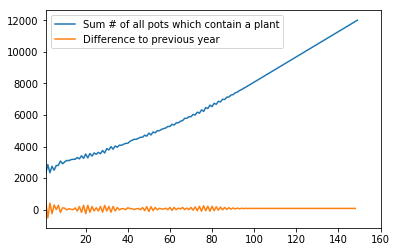

In [39]:
def d12_p2(_input):
    state = _input[0][len('initial state: '):]

    rules = defaultdict()
    for rule in _input[2:]:
        r, result = rule.split(' => ')
        rules[r] = result

    zero_idx = 0
    totals = []
    for i in range(150):
        state, zero_idx = next_generation(state, rules, zero_idx)
        totals.append(sum(i-zero_idx for i,p in enumerate(state) if p == '#'))
    
    plt.xlim([1,160])
    plt.plot(totals)    
    plt.plot([totals[n] - totals[n-1] for n in range(1, len(totals))])
    plt.legend(['Sum # of all pots which contain a plant', 'Difference to previous year'], loc='upper left')
    plt.show()
    
d12_p2(input_d12)        

As we can see from the figure above, the sum of the number of all the pots that contain a plant increases linearly over the years. After the 100 generation, the increase is constant and is equal to 80. So I took (50e9 - 150) * 80 and added that to the output of the first 150 iterations (12000) to get the answer.


In [40]:
int((50e9 - 150) * 80 + 12000)

4000000000000

### [Day 13: Mine Cart Madness](https://adventofcode.com/2018/day/13)

A crop of this size requires significant logistics to transport produce, soil, fertilizer, and so on. The Elves are very busy pushing things around in carts on some kind of rudimentary system of tracks they've come up with. One problem the Elves are facing is how to avoid collisions between the carts.

After following their respective paths for a while, the carts eventually crash. To help prevent crashes, we'd like to know the location of these crashes.

Our puzzle input is a map of the tracks. Here is an example:

    /->-\        
    |   |  /----\
    | /-+--+-\  |
    | | |  | v  |
    \-+-/  \-+--/
     \------/   

#### Part One

>What is the location of the first crash?

This looks like a fun simulation problem. Let's start by defining a class to represent the cart and its status as well as some lookup tables to help compute the direction and position of the carts after each tick.

In [41]:
class Cart:
    def __init__(self, p, d):
        self.position = p
        self.direction = d
        self.next_turn = 0 #0 -> Left, 1 -> Straight, 2 -> Right
        self.crashed = False
        
    def tick_update(self, tracks):
        #take one step in the current direction
        self.position = (self.position[0] + self.direction[0], 
                         self.position[1] + self.direction[1])

        #retrieve the new position on the tracks
        part = tracks[self.position]

        # calculate the new cart direction based on the location on the track, 
        # current direction and last turn
        if part in '\\/|-': #turn left or right depending on current direction
            self.direction = new_direction[(self.direction, part, '')]

        elif part == '+':  #intersection: new direction depends on last turn
            self.direction = new_direction[self.direction, part, self.next_turn]
            self.next_turn = (self.next_turn + 1) % 3

    def crash(self, other):
        return self != other and self.position == other.position      

I decided to represent the tracks as a dictionary with keys corresponding to the coordinates (x, y) where (0, 0) is the topleft corner. The cart's velocity is constant and corresponds to one step per tick. Moving a cart UP, DOWN, LEFT and RIGHT, corresponds to the subtracting/adding 1 the current (x, y) coordinates

In [42]:
UP, DOWN, LEFT, RIGHT = (0, -1), (0, 1), (-1, 0), (1, 0)  

# map text input and cart directions
directions = {'^': UP, 'v': DOWN, '<': LEFT, '>': RIGHT}

# lookup table to help computing the new cart direction based on its 
# current direction, location on the track and the its next turn direction

#(current_dir, 'track_location', 'next_turn') #Next_turn = {0: Left, 1: Straight, 2: Right}
new_direction = {
        
        (UP, '|',  ''): UP,
        (UP, '\\', ''): LEFT,
        (UP, '/',  ''): RIGHT,
        (UP, '+',  0): LEFT, #when facing an intersection, the cart's direction depends on its next turn
        (UP, '+',  1): UP,
        (UP, '+',  2): RIGHT,
        
        (LEFT, '-',  ''): LEFT,
        (LEFT, '\\', ''): UP,
        (LEFT, '/',  ''): DOWN,
        (LEFT, '+',  0): DOWN,
        (LEFT, '+',  1): LEFT,
        (LEFT, '+',  2): UP,

        (RIGHT, '-',  ''): RIGHT,
        (RIGHT, '\\', ''): DOWN,
        (RIGHT, '/',  ''): UP,
        (RIGHT, '+',  0): UP,
        (RIGHT, '+',  1): RIGHT,
        (RIGHT, '+',  2): DOWN,

        (DOWN, '|',  ''): DOWN,
        (DOWN, '\\', ''): RIGHT,
        (DOWN, '/',  ''): LEFT,
        (DOWN, '+',  0): RIGHT,
        (DOWN, '+',  1): DOWN,
        (DOWN, '+',  2): LEFT
        }

Let's parse the input and create a helper function to display the tracks.

In [43]:
def setup(initial_state):
    tracks = defaultdict(lambda : "")
    carts = []
    for y, line in enumerate(initial_state):
        for x, p in enumerate(line):
            if p in '^v<>':
                carts.append(Cart((x, y), directions[p]))
                #if its a cart, decode what is the piece of track underneath it based on the cart direction
                tracks[(x, y)] = {'<': '-', '>': '-', '^': '|', 'v': '|'}[p]
            else:
                tracks[(x, y)] = p

    return carts, tracks

def show_track(tracks, carts):
    (mx, my) = max((k[0], k[1]) for k in tracks.keys())
    for y in range(my + 1):
        r = ""
        for x in range(mx + 1):
            if (x, y) in [c.position for c in carts]:
                r = r + "X"
            else:
                r = r + tracks[(x, y)]
        print(r)

Now we just need to simulate the movement of the carts on the tracks by updating their positions after each tick. 

In [44]:
def d13_p1(file_input, show=False):
    carts, tracks = setup(file_input)

    while True:
        #ensure that we move the carts in the correct order from top to bottom, left to right
        for c in sorted(carts, key=lambda x: (x.position[1], x.position[0])):
            c.tick_update(tracks)

            for other in carts:
                if c.crash(other):
                    c.crashed = other.crashed = True
                    if show:
                        show_track(tracks, carts)
                    return c.position
             

Giving it a try with the test input

In [45]:
example_d13 = r'''
/->-\        
|   |  /----\
| /-+--+-\  |
| | |  | v  |
\-+-/  \-+--/
  \------/      
'''.strip().splitlines() 

d13_p1(example_d13, True)

/---\        
|   |  /----\
| /-+--+-\  |
| | |  X |  |
\-+-/  \-+--/


(7, 3)

Now with the real input

In [46]:
input_d13 = read_input('13') 

d13_p1(input_d13)

(116, 10)

That gives a star for part one.

#### Part Two

>What is the location of the last cart at the end of the first tick where it is the only cart left?

In [47]:
def d13_p2(file_input):
    carts, tracks = setup(file_input)

    while True:
        #ensure that we move the carts in the correct order from top to bottom, left to right
        for c in sorted(carts, key=lambda x: (x.position[1], x.position[0])):
            c.tick_update(tracks)

            for other in carts:
                if c.crash(other):
                    #set the carts as crashed so that both are removed from the tracks
                    c.crashed = other.crashed = True
        
        #remove all the carts that have crashed in this tick
        carts = [x for x in carts if x.crashed == False]
        
        #stop when there is only one cart left
        if len(carts) == 1: 
            return carts[0].position
        
d13_p2(input_d13)        

(116, 25)

And that gives us the second star.

### [Day 14: Chocolate Charts](https://adventofcode.com/2018/day/14)

We finally find the reason for all the pots and their plants and tracks with their carts. The Elves are growing the plants to make hot chocolate and use the tracks to move the produce to a makeshift underground laboratory.

The Elves are trying to come up with the ultimate hot chocolate recipe; they're even maintaining a scoreboard which tracks the quality score (0-9) of each recipe. They think their skill will improve after making a few recipes (our puzzle input). However, that could take ages; we can speed this up considerably by identifying the scores of the ten recipes after that.  

#### Part One

>What are the scores of the ten recipes immediately after the number of recipes in your puzzle input?

In [48]:
def d14_p1(target=430971):
    scoreboard = [3, 7]   #initially there are onlt 2 recipes on the scoreboard
    elf1 = 0 #elf1's current recipe is 3
    elf2 = 1 #elf2's current recipe is 7
    
    while len(scoreboard) < target + 10:
        score = scoreboard[elf1] + scoreboard[elf2]
        scoreboard.extend(divmod(score, 10) if score >= 10 else (score,))
        
        elf1 = (elf1 + 1 + scoreboard[elf1]) % len(scoreboard)
        elf2 = (elf2 + 1 + scoreboard[elf2]) % len(scoreboard)
        
    return ''.join(map(str, scoreboard[-10:]))

d14_p1()

'5715102879'

#### Part Two

>How many recipes appear on the scoreboard to the left of the score sequence in your puzzle input?

In [49]:
def d14_p2(target=430971):
    scoreboard = [3, 7]   #initially there are onlt 2 recipes on the scoreboard
    elf1 = 0 #elf1's current recipe is 3
    elf2 = 1 #elf2's current recipe is 7
    
    digits = list(map(int, str(target)))
    
    #a maximum of two recipes can be added to the scoreboard per round
    #we need to compare scoreboard[-len(digits):] == digits or scoreboard[-len(digits)-1:-1] == digits
    while scoreboard[-len(digits):] != digits and scoreboard[-len(digits)-1:-1] != digits:
        score = scoreboard[elf1] + scoreboard[elf2]
        scoreboard.extend(divmod(score, 10) if score >= 10 else (score,))
        
        elf1 = (elf1 + 1 + scoreboard[elf1]) % len(scoreboard)
        elf2 = (elf2 + 1 + scoreboard[elf2]) % len(scoreboard)
        
    return len(scoreboard) - len(digits) - (0 if scoreboard[-len(digits):] == digits else 1)

d14_p2()

20225706

### [Day 15: Beverage Bandits](https://adventofcode.com/2018/day/15)

After an easy time with the puzzle for day 14, we face a tough one. We have to simulate a turn-based battle game between the Elves and the Goblins. 

Our puzzle input consists of a map of the area, detailing the positions of walls (#), open cavern (.), and starting positions of every Goblin (G) and Elf (E).

Combat proceeds in rounds; in each round, each unit that is still alive takes a turn, resolving all of its actions before the next unit's turn begins. On each unit's turn, it tries to move into range of an enemy (if it isn't already) and then attack (if it is in range). If no targets remain, combat ends.

The most complicated part was making sure that the tie breaking rules where correctly applied whenever a unit had more than one target to attack, or more than one shortest path was found.

After fixing an issue with the game logic (I forgot that the units could move and attack in the same turn), I had an initial solution that worked on all the combat scenarios, but had a subtle bug that I detected for the first time when using the real input. I noticed later, that it I could have detected it earlier if I had used the first example of movement: 

     Initial      3rd round
    #########     #########
    #G..G..G#     #.......#
    #.......#     #..GGG..#
    #.......#     #..GEG..#
    #G..E..G#  => #G..G...#
    #.......#     #......G#
    #.......#     #.......#
    #G..G..G#     #.......#
    #########     #########

**Note to self**: Make sure that all test cases pass before trying the solution against the real input.

#### Part One

>What is the outcome of the combat described in your puzzle input?

I decided to create two simple classes to represent the game units (Elves and Goblins) and the game state. The class **Unit** defaults the unit's attack power to 3 but allows for the Elves to have a different setting (needed for Part Two of the puzzle). The class **Game** is where the combat logic is defined. The most important methods are **move_unit** and **best_move**. These implement the "closest in reading-order" logic.

In [50]:
class Race(Enum):
    elf = 'E'
    goblin = 'G'

class Unit:
    def __init__(self, position, race, attack_power=3, hp=200):
        self.position = position
        self.race = race
        self.hp = hp
        self.attack_power = attack_power if race == Race.elf else 3

class Game:
    def __init__(self, area, elf_attack_power=3):
        self.area = []
        self.walls = set() #position of the walls 
        self.units = [] 
        self.rounds = 0

        for y, line in enumerate(area):
            self.area.append(list(line.strip()))
            for x, c in enumerate(line):
                if c == '#':
                    self.walls.add((x, y))
                elif c in 'EG':
                    self.units.append(Unit((x, y), Race(c),
                        attack_power=elf_attack_power))
                    self.area[y][x] = '.'

    def occupied_squares(self):
        '''Coordinates of the walls and the squares occupied by the Elves and Goblins'''
        return self.walls | set([u.position for u in self.units if u.hp > 0])

    def show_area(self):
        print('Status after {} rounds: '.format(self.rounds))
        for y, row in enumerate(self.area):
            r = []
            for x, a in enumerate(row):
                if (x, y) in [u.position for u in self.units]:
                    r.append([u.race.value for u in self.units if u.position == (x,
                        y)][0])
                else:
                    r.append(a)
            scores = ', '.join(f"{u.race.value}({u.hp})" for u in
                               sorted([x for x in self.units
                                       if x.position[1] == y],
                                      key=lambda z: z.position[0]))
            print(''.join(r) + '\t' + scores)

    def turn(self):
        #units take their turns in reading order (top-to-bottom, left-to-right)
        for unit in sorted(self.units, key=lambda u: (u.position[1],
            u.position[0])):

            #units that died during the round
            if unit.hp <= 0:
                continue

            #find the unit's next action: attack or move
            targets, action = self.next_action(unit)    

            #no valid target was found - end game
            if action == 'no_action':
                return False

            if action == 'move' and targets:
                self.move_unit(unit, targets)

                #unit has moved, lets see if it is in range of a target
                targets, action = self.next_action(unit)

            if action == 'attack' and targets:
                #pick the target with fewest hp that is closest in reading order
                t = sorted(targets, key = lambda x : (x.hp, x.position[1],
                             x.position[0]))[0]

                self.attack_target(unit, t)

        #after each turn, remove any units that have died
        self.units = [u for u in self.units if u.hp > 0]

        self.rounds += 1
        #self.show_area()

        return True

    def adjacent_positions(self, position):
        return set([(position[0] + a, position[1] + b) 
            for a, b in [(0, -1), (-1, 0), (1, 0), (0, 1)]])

    def next_action(self, unit):
        '''determines whether a unit should attack or move.
        if the unit is in range of one or more targets, return the target(s)
        and set the action to "attack"
        if it is not in range of a target, return all the targets that have 
        squares in range and set the action to "move"
        if there are not more targets, return "no_action" to end the game
        '''
        #if there are no targets, return "no_action"
        if len([t for t in self.units if t.race != unit.race and t.hp > 0]) == 0:
            return None, 'no_action'

        can_attack = []
        pos = self.adjacent_positions(unit.position)
        can_attack = [t for t in self.units for p in pos if t.race is not
                unit.race and t.hp > 0 and
                t.position[0] == p[0] and t.position[1] == p[1]]
        
        if can_attack:
            return can_attack, 'attack'

        #all squares that are occupied with walls or other units
        occupied = self.occupied_squares()
        #all targets with open adjacent squares
        targets = []
        for t in self.units:
            if t is not unit and t.race is not unit.race and t.hp > 0:
                if self.adjacent_positions(t.position) - occupied:
                    targets.append(t)

        return targets, 'move'

    def move_unit(self, unit, targets):
        '''from the list of targets, move towards the one that is reachable 
        and is closest in reading order
        '''
        results = []
        best = None
        occupied = self.occupied_squares()
       
        in_range = []
        for t in targets:
            in_range.extend(self.adjacent_positions(t.position)-occupied)

        visited = occupied - set([unit.position])
        queue = deque([(0, [unit.position])])
        while queue:
            distance, path = queue.popleft()
            if best and len(path) > best:
                break
            node = path[-1]
            if node in in_range:
                results.append(path)
                best = len(path)
                continue
            if node in visited:
                continue
            visited.add(node)
            for neighbor in sorted(self.adjacent_positions(node), key = lambda
                    x : (x[1], x[0])):
                if neighbor in visited:
                    continue
                queue.append((distance + 1, path + [neighbor]))
        
        if results:
            coordinate = self.best_move(results)
            unit.position = coordinate

    def best_move(self, moves):
        '''Decide which of the paths found should be taken based on the given
        rules'''

        #if there is only one path found, return the first move
        if len(moves) == 1:
            return moves[0][1]

        #create pairs (first_coordinate, final_coordinate)
        paths = [(p[1], p[-1]) for p in moves]
        paths.sort(key = lambda x : (x[1][1], x[1][0], x[0][1], x[0][0]))

        # order the paths by destination and initial coordinate both in reading order
        return paths[0][0]

    def attack_target(self, unit, target):
        target.hp -= unit.attack_power

    def num_elves(self):
        return len([u for u in self.units if u.race is Race.elf and u.hp > 0])

    def run(self):
        while True:
            if not self.turn():
                return self.rounds, self.total_hp(), self.num_elves()

    def total_hp(self):
        return sum(u.hp for u in self.units if u.hp > 0)        

To obtain the answer for Part One, we just need to run the simulation

In [51]:
input_d15 = read_input('15')

def d15_p1(area):
    game = Game(area)
    rounds, total_hp, _ = game.run() 
    game.show_area()

    return rounds * total_hp

d15_p1(input_d15)

Status after 74 rounds: 
################################	
################..#...##...#####	
#######..#######..#....##..#####	
#######....#####........##.#####	
######.....#####........##.#####	
######.....##.###..........#####	
#####.........####.......#######	
######.#......####......GE######	G(14), E(-1)
##########....#####......G######	G(179)
########.......###....G..G..####	G(179), G(200)
#########.....####.....GG.....##	G(5), G(32)
#########............GG......###	G(113), G(200)
######........#####..G.G.....###	G(200), G(200)
####.........#######...G....####	G(200)
###.........#########...G...####	G(200)
#...#.......#########G.........#	G(200)
#..###..#...#########........###	
#..##...#...#########.........##	
#...........#########.........##	
#............#######........####	
###......#....#####........#####	
###########......G.G........####	G(200), G(131)
##########........G..........###	G(200)
##########...................###	
#######..................##.####	
#######.........

181522

#### Part Two

>After increasing the Elves' attack power until it is just barely enough for them to win without any Elves dying, what is the outcome of the combat described in your puzzle input?

We need to run the simulation, increasing the Elves attack power in each iteration, until the Elves win without any death.

In [52]:
def d15_p2(area):
    for p in count(4):
        game = Game(area, elf_attack_power=p)
        num_elves = game.num_elves()
        rounds, total_hp, num_elves_alive = game.run()

        if num_elves == num_elves_alive:
            game.show_area()
            return rounds * total_hp

d15_p2(input_d15)       

Status after 58 rounds: 
################################	
################..#...##...#####	
#######..#######..#....##..#####	
#######....#####........##.#####	
######.....#####........##.#####	
######.....##.###..........#####	
#####.........####.......#######	
######.#......####........######	
##########....#####.......######	
########.......###..........####	
#########.....####............##	
#########........GE..........###	G(-4), E(47)
######........#####..........###	
####.........#######........####	
###.........#########.......####	
#...#.......#########..........#	
#..###..#...#########.E......###	E(155)
#..##...#...#########.........##	
#...........#########.........##	
#...........E#######E.......####	E(188), E(62)
###......#...E#####........#####	E(101)
###########.E..E..E.........####	E(8), E(119), E(164)
##########.EE................###	E(134), E(200)
##########...................###	
#######..................##.####	
#######................#########	
########.#..........

68324

That gives us our second star of the day!

### [Day 16: Chronal Classification](https://adventofcode.com/2018/day/16)

On day 16 we try to understand how the wrist device works. According to its programming manual, the device has four registers (numbered 0 through 3) that can be manipulated by instructions containing one of 16 opcodes. The registers start with the value 0.

The opcodes fall into seven general categories:
     
    Addition
    Multiplication
    Bitwise AND
    Bitwise OR
    Assignment
    Greater-than testing
    Equality testing

Each of the instructions consists of four values: an opcode, two inputs (named A and B), and an output (named C), in that order. The opcode specifies the behavior of the instruction and how the inputs are interpreted. The output, C, is always treated as a register.

Unfortunately, while the manual gives the name of each opcode, it doesn't seem to indicate the number. Based on the samples that we were given (our puzzle input) we have to reverse engineer the opcode numbers and map them to different instructions.

#### Part One

>How many samples in your puzzle input behave like three or more opcodes?

Each sample gives us the contents of the registers before and after the instruction is executed.

    Before: [3, 2, 1, 1]
    9 2 1 2
    After:  [3, 2, 2, 1]

For every sample, we compare its results (After:) against the result of executing each of the instructions in our device, keeping track of the number of instructions that produce the same result.

In [53]:
instructions = {
    'addr': lambda registers, a, b: registers[a] + registers[b],
    'addi': lambda registers, a, b: registers[a] + b,
    'mulr': lambda registers, a, b: registers[a] * registers[b],
    'muli': lambda registers, a, b: registers[a] * b,
    'banr': lambda registers, a, b: registers[a] & registers[b],
    'bani': lambda registers, a, b: registers[a] & b,
    'borr': lambda registers, a, b: registers[a] | registers[b],
    'bori': lambda registers, a, b: registers[a] | b,
    'setr': lambda registers, a, b: registers[a] ,
    'seti': lambda registers, a, b: a,
    'gtir': lambda registers, a, b: 1 if a > registers[b] else 0,
    'gtri': lambda registers, a, b: 1 if registers[a] > b else 0,
    'gtrr': lambda registers, a, b: 1 if registers[a] > registers[b] else 0,
    'eqir': lambda registers, a, b: 1 if a == registers[b] else 0,
    'eqri': lambda registers, a, b: 1 if registers[a] == b else 0,
    'eqrr': lambda registers, a, b: 1 if registers[a] == registers[b] else 0
    }

def d16_p1(samples):
    behaves_like_three_or_more = 0
    for sample in samples:
        before, op, after = [list(map(int, re.findall(r'-?\d+', s))) for s in sample.splitlines()]
    
        count = 0
        for instr in instructions:
            result = before[:]
            result[op[3]] = instructions[instr](before, op[1], op[2])
            
            if after == result:
                count += 1
        if count >= 3:
            behaves_like_three_or_more += 1
    
    return behaves_like_three_or_more


input_d16 = read_input_string('16')
*samples, _, program = input_d16.split('\n\n')

d16_p1(samples)

570

#### Part Two

Using the samples we collected, we now need to work out the number of each opcode and execute the test program (the second section of our puzzle input).

>What value is contained in register 0 after executing the test program?

I have decided to repeat the process from part one but this time, whenever there is a match between the sample and the result of the device's instruction, I store this as a potential mapping candidate. Inversely, whenever there is a mismatch, I will remove the instruction from the candidate list.

After processing all the samples, I expect that some of the opcodes will have only one candidate instruction and therefore have been precisely determined. So I'll remove this instruction from the candidates list of all the other opcodes where an ambiguity exists.

We then need just to execute all the instructions in the program, using the mapping table, and verify what is the value contained in register 0.

In [54]:
def d16_p2(samples, program):
    candidates = defaultdict(set)
    for sample in samples:
        before, op, after = [list(map(int, re.findall(r'-?\d+', s))) for s in sample.splitlines()]
    
        count = 0
        for instr in instructions:
            result = before[:]
            result[op[3]] = instructions[instr](before, op[1], op[2])
            
            if after == result:
                candidates[op[0]].add(instr)
            else:
                candidates[op[0]].discard(instr)
    
    mapping = defaultdict(lambda : "")
    while any(candidates.values()):
        for opcode, instrs in candidates.items():
            if len(instrs) == 1:
                mapping[opcode] = instrs.pop()
                for other in candidates.values():
                    other.discard(mapping[opcode])
    
    assert 16 == len(set(mapping.keys())) == len(set(mapping.values()))
        
    registers = [0] * 4
    for instr in program.splitlines():
        opcode, a, b, c = [int(i) for i in re.findall(r'-?\d+', instr)]
        registers[c] = instructions[mapping[opcode]](registers, a, b)
        
    return registers[0]

d16_p2(samples, program)                

503

### [Day 17: Reservoir Research](https://adventofcode.com/2018/day/17)

Day 17 presents another simulation problem. Our puzzle input consists of a scan of a two-dimensional vertical slide of te ground. In the scan, x represents the distance to the right, and y represents the distance down. There is also a spring of water near the surface at x=500, y=0. The scan identifies which square meters are clay. Our objective is to determine how much water is trapped underneath the surface.

We start by parsing the input file and creating a two-dimensional array to the represent the ground.

In [55]:
input_d17 = read_input('17')

Vein = namedtuple('Vein', ['vertical','x','y','end'])

def parse_vein(vein):
    vertical = vein[0] == 'x'
    a, b = vein.split(', ')
    if vertical:
        x = int(a[2:])
        y, end = [int(i) for i in re.findall(r'\d+', b)]
    else:
        y = int(a[2:])
        x, end = [int(i) for i in re.findall(r'\d+', b)]
        
    return Vein(vertical, x, y, end)

def parse_scan(scan):
    veins = [parse_vein(s) for s in scan]
    
    min_x = min(v.x for v in veins) - 1
    max_x = max(v.end if not v.vertical else v.x for v in veins) + 1
    min_y = min(v.y for v in veins)
    max_y = max(v.end if v.vertical else v.y for v in veins) + 1
    
    ground = [['.'] * (max_x - min_x + 1) for _ in range(max_y)]
    
    for vein in veins:
        if vein.vertical:
            for i in range(vein.y, vein.end + 1):
                ground[i][vein.x-min_x] = '#'
        else:
            for i in range(vein.x, vein.end + 1):
                ground[vein.y][i-min_x] = '#'
    
    return ground, min_x, max_x, min_y, max_y

Here is the example input 

    x=495, y=2..7
    y=7, x=495..501
    x=501, y=3..7
    x=498, y=2..4
    x=506, y=1..2
    x=498, y=10..13
    x=504, y=10..13
    y=13, x=498..504

And here' the result after rendering it:  

In [56]:
test_input = r'''x=495, y=2..7
y=7, x=495..501
x=501, y=3..7
x=498, y=2..4
x=506, y=1..2
x=498, y=10..13
x=504, y=10..13
y=13, x=498..504'''

g, _, _, _, m = parse_scan(test_input.splitlines())
g[0][6] = '+'
for y in range(m):
    print(''.join(g[y]))

......+.......
............#.
.#..#.......#.
.#..#..#......
.#..#..#......
.#.....#......
.#.....#......
.#######......
..............
..............
....#.....#...
....#.....#...
....#.....#...
....#######...




    ......+.......
    ......|.....#.
    .#..#||||...#.
    .#..#~~#|.....
    .#..#~~#|.....
    .#~~~~~#|.....
    .#~~~~~#|.....
    .#######|.....
    ........|.....
    ...|||||||||..
    ...|#~~~~~#|..
    ...|#~~~~~#|..
    ...|#~~~~~#|..
    ...|#######|..

Initially there is only one water flow that originates from the water spring (500, 0). The spring of water produces water forever. Water can move through sand, but is blocked by clay.  

I have decided to use a recursive pattern to process the water flow. Water always moves down when possible, and spreads to the left and right otherwise, filling space that has clay on both sides and falling out otherwise, originating one or two new water sources/flows. Water sources are processed until we reach a depth that is larger than the largest y coordinate in our puzzle input.



In [57]:
def spread_water(ground, origin, min_x, max_x):
    spill = False
    new_sources = []

    #spread left
    (x, y) = origin
    x -= 1
    while x >= min_x:
        g = ground[y][x]
        below = ground[y+1][x]
        if g in '#~':
            x += 1
            break
        
        elif below == '.': #new source
            spill = True
            new_sources.append((x, y))
            break
        elif g == '|' and below == '|':
            break

        x -= 1
    left = x

    #spread right
    (x, y) = origin
    x += 1
    while x <= max_x:
        g = ground[y][x]
        below = ground[y+1][x]
        if g in '#~': 
            x -= 1
            break

        elif below == '.': #new source
            spill = True
            new_sources.append((x, y))
            break

        elif g == '|' and below == '|':
            break

        x += 1
    right = x

    return left, right, spill, new_sources

def source_flow(source, ground, min_x, max_x, max_y):
    (x, y) = source
    start_y = y

    if ground[y][x] == '~':
        return

    y += 1
    while y < max_y and y > start_y:
        g = ground[y][x]

        if g == '.':
            ground[y][x] = '|'
            y += 1
        elif g in '~#':
            y -= 1          #go one level up and check if the water overflows
            left, right, spill, sources = spread_water(ground, (x, y), min_x, max_x)

            for i in range(left, right+1):
                ground[y][i] = '|' if spill else '~' 

            if spill:       #if spill then there is at least one new source
                for s in sources:
                    source_flow(s, ground, min_x, max_x, max_y)

        elif g == '|':  
            return #merge with other sources

#### Part One

>How many tiles can the water reach within the range of y values in your scan?

To answer the first part we need only to count the number of tiles with falling ('|') or standing water ('~') after the simulation is completed.

In [58]:
def d17_p1(scan, water_spring=(500, 0)):
    ground, min_x, max_x, min_y, max_y = parse_scan(scan)
    #add the initial source of water
    ground[water_spring[1]][water_spring[0]-min_x] = '+'

    water_spring = (water_spring[0]-min_x, water_spring[1])
    source_flow(water_spring, ground, 0, max_x-min_x, max_y)

    return sum(1 for x in range(max_x-min_x) for y in range(min_y, max_y) if
            ground[y][x] in '|~')

d17_p1(input_d17)

50838

#### Part Two

>How many water tiles are left after the water spring stops producing water and all remaining water not at rest has drained?

The answer again is found after running the simulation. This time, we count only the number of tiles with standing water ('~')

In [59]:
def d17_p2(scan, water_spring=(500, 0)):
    ground, min_x, max_x, min_y, max_y = parse_scan(scan)
    #add the initial source of water
    ground[water_spring[1]][water_spring[0]-min_x] = '+'

    water_spring = (water_spring[0]-min_x, water_spring[1])
    source_flow(water_spring, ground, 0, max_x-min_x, max_y)

    return sum(1 for x in range(max_x-min_x) for y in range(min_y, max_y) if
            ground[y][x] == '~')

d17_p2(input_d17)

43039

### [Day 18: Settlers of The North Pole](https://adventofcode.com/2018/day/18)

Just like day 12, today's puzzle is a [cellular automaton](https://en.wikipedia.org/wiki/Cellular_automaton), and in this case similar to [Conway's Game of Life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life): a two-dimensional orthogonal grid of square cells, each of which is in one of **three** possible states, open ground (.), trees (|), or a lumberyard (#). Every cell interacts with its eight neighbours, which are the cells that are horizontally, vertically, or diagonally adjacent. Each minute, the following transitions occur: 

    An open acre will become filled with trees if three or more adjacent acres contained trees. Otherwise, nothing happens.
    An acre filled with trees will become a lumberyard if three or more adjacent acres were lumberyards. Otherwise, nothing happens.
    An acre containing a lumberyard will remain a lumberyard if it was adjacent to at least one other lumberyard and at least one acre containing trees. Otherwise, it becomes open.

These changes happen across all acres simultaneously. Each generation is a pure function of the preceding one. The rules continue to be applied repeatedly to create further generations.

#### Part One

>What will the total resource value of the lumber collection area be after 10 minutes?

The first part is straightforward: The answer corresponds to the **#trees x #lumberyards** that exist in our grid, after 10 generations.

In [61]:
def adjacent_acres(lumber_collection, acre):
    return [lumber_collection[(acre[0]+x, acre[1]+y)] for (x, y) in 
            product((-1, 0, 1), (-1, 0, 1)) if x or y]

def next_minute(lumber_collection, w, h):
    res = defaultdict(lambda : "")
    for y in range(h):
        for x in range(w):
            c = lumber_collection[(x, y)]
            counts = Counter(adjacent_acres(lumber_collection, (x, y)))
            if c == '.':
                if counts['|'] >= 3:
                    c = '|'
            elif c == '|':
                if counts['#'] >= 3:
                    c = '#'
            elif c == '#':
                if counts['#'] < 1 or counts['|'] < 1:
                    c = '.'

            res[(x, y)] = c
    return res


def d18_p1(area, w=50, h=50):
    lumber_collection = defaultdict(lambda: "")
    for y, line in enumerate(area):
        for x, c in enumerate(line):
            lumber_collection[(x, y)] = c

    for i in range(10):
        lumber_collection = next_minute(lumber_collection, w, h)

    for y in range(h):
        r = []
        for x in range(w):
            r.append(lumber_collection[(x, y)])
        print(''.join(r))

    num_trees = sum(1 for v in lumber_collection.values() if v == '|')
    num_lumberyards = sum(1 for v in lumber_collection.values() if v == '#')

    return num_trees * num_lumberyards

input_d18 = read_input('18')
d18_p1(input_d18)


......#||||||||||.........##||||||||||||||||||||||
......##|||||||||.........##|||||||||||###########
.#....##||||||||||.........##|||||||||############
##.....##|||||||||.........#||||||||||##..##|##...
##.....##|||||||##..........||||||||||##.##|||##..
##.....##|||||||##...........|||||||||#####|||###.
##......##|||||##..............||||||||####||||##.
........##||||###...............||||||||###||||||#
......|###|||##..#####...........||||||||#||||||||
.....||||||||##...#####..........||||####|||||||||
....##||||#||##...|||##...........|||########|||||
.....##|####||#####||##...........|||#..#######|||
###.######.##||####||##............||........##|||
|#####|##..#|||||#|||##...........##..........##||
||####|##..||||||||||##..........####........##|||
||###|||...||||||||||##.........#####.........||||
##..........##|||||||##........###|##.........|||.
............###|||||||##......###|###########.....
.............###|||#||##.....###||##########|.....
.|||#.........##|||#|||.......|

467819

#### Part Two

>What will the total resource value of the lumber collection area be after 1000000000 minutes?

Running the simulation 1e9 times will for sure take a long time. We can try and identify a loop pattern.

In [62]:
def d18_p2(area, w=50, h=50):
    lumber_collection = defaultdict(lambda: "")
    for y, line in enumerate(area):
        for x, c in enumerate(line):
            lumber_collection[(x, y)] = c

    totals = defaultdict(lambda : 0)
    prev = 0
    for i in count(1):
        lumber_collection = next_minute(lumber_collection, w, h)
        counts = Counter(lumber_collection.values())
        total = counts['|'] * counts['#']
        period = i - totals[total]
        if period == prev:
            if 1000000000 % period == i % period:
                return total
        totals[total] = i
        prev = period

d18_p2(input_d18)

195305